In [169]:
import pandas as pd
import itertools
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Suppress warnings
warnings.filterwarnings("ignore")

In [170]:
df = pd.read_csv('final_converted_out.csv')
df.head()

,manufacturer,device,has_jack,has_loudspeaker,has_stereo,has_dual,average_dollar_price,Launch_year,IsAvailable,Battery_Capacity,...,display_screen_body_ratio,display_width_px,display_height_px,display_density,platform_os,platform_cpu_count,platform_cpu_speed_ghz,memory_internal_storage,memory_ram,main_camera_single_mp
0,acer,acer_iconia_talk_s,1,1,0,0,181.9,2016,1,3400,...,69.8,720,1280,210,android,4.0,1.3,32.0,2.0,13.0
1,acer,acer_liquid_z6_plus,1,1,0,0,267.5,2016,1,4080,...,71.7,1080,1920,401,android,8.0,1.3,32.0,3.0,13.0
2,acer,acer_liquid_x2,1,1,0,0,246.1,2015,1,4020,...,69.0,720,1280,267,android,8.0,1.3,32.0,3.0,13.0
3,acer,acer_iconia_tab_a500,1,1,1,0,214.0,2011,1,3260,...,64.3,800,1280,149,android,2.0,1.0,32.0,1.0,5.0
4,acer,acer_liquid_jade_primo,1,1,0,0,235.4,2015,1,2870,...,70.2,1080,1920,401,microsoft,6.0,1.8,32.0,3.0,21.0


In [171]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df.head()

['manufacturer', 'device', 'display_tech', 'platform_os']


,manufacturer,device,has_jack,has_loudspeaker,has_stereo,has_dual,average_dollar_price,Launch_year,IsAvailable,Battery_Capacity,...,display_screen_body_ratio,display_width_px,display_height_px,display_density,platform_os,platform_cpu_count,platform_cpu_speed_ghz,memory_internal_storage,memory_ram,main_camera_single_mp
0,acer,acer_iconia_talk_s,1,1,0,0,181.9,2016,1,3400,...,69.8,720,1280,210,android,4.0,1.3,32.0,2.0,13.0
1,acer,acer_liquid_z6_plus,1,1,0,0,267.5,2016,1,4080,...,71.7,1080,1920,401,android,8.0,1.3,32.0,3.0,13.0
2,acer,acer_liquid_x2,1,1,0,0,246.1,2015,1,4020,...,69.0,720,1280,267,android,8.0,1.3,32.0,3.0,13.0
3,acer,acer_iconia_tab_a500,1,1,1,0,214.0,2011,1,3260,...,64.3,800,1280,149,android,2.0,1.0,32.0,1.0,5.0
4,acer,acer_liquid_jade_primo,1,1,0,0,235.4,2015,1,2870,...,70.2,1080,1920,401,microsoft,6.0,1.8,32.0,3.0,21.0


In [172]:
X_orig = df_encoded.drop('average_dollar_price', axis=1)
y_orig = df_encoded['average_dollar_price']
print(X.shape)
print(y.shape)

(719, 875)
(719,)


In [173]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
X = pd.DataFrame(X, columns = X_orig.columns)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

# Display training inputs
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(539, 875)
(539,)
(180, 875)
(180,)


0.0025691197715838054


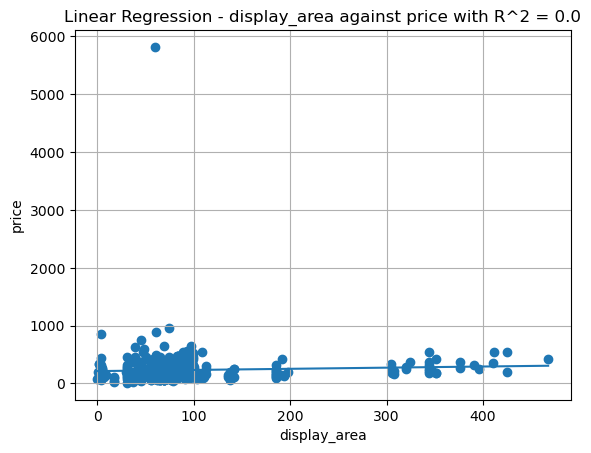

In [182]:
# Fit one feature

X_train_display_area = X_train["display_area_cm2"].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train_display_area, y_train)
r2 = r2_score(y_train, model.predict(X_train_display_area))
print(r2)

# plot
x_grid = np.arange(X_train_display_area.min(), X_train_display_area.max(), 0.1).reshape(-1, 1)
y_grid = model.predict(x_grid)
plt.scatter(X_train_display_area, y_train)
plt.plot(x_grid, y_grid)

# Label the plot and display R-squared score
plt.xlabel('display_area')
plt.ylabel('price')
plt.title(f'Linear Regression - display_area against price with R^2 = {round(r2,2)}')
plt.grid(True)
plt.show()